# Learning by repeating topical data analysis

Loading the libraries

In [1]:
# install.packages("devtools")
# install.packages("usmap")
# install.packages("gplots")
# install.packages("data.table")
# install.packages("patternplot")
# install.packages("cowplot")
# install.packages("reshape2")
#install.packages("stringi")
# install.packages("patternplot")
# install.packages("RColorBrewer")


library(ggplot2)
library(reshape2)
library(cowplot)
library(patternplot)
library(usmap)
library(devtools)
library(data.table)
library(ggplot2)
library(RColorBrewer)



Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave


Attaching package: 'data.table'

The following objects are masked from 'package:reshape2':

    dcast, melt



# 1. Influenza National Summary

Influenza National Summary for the year 2018-2019

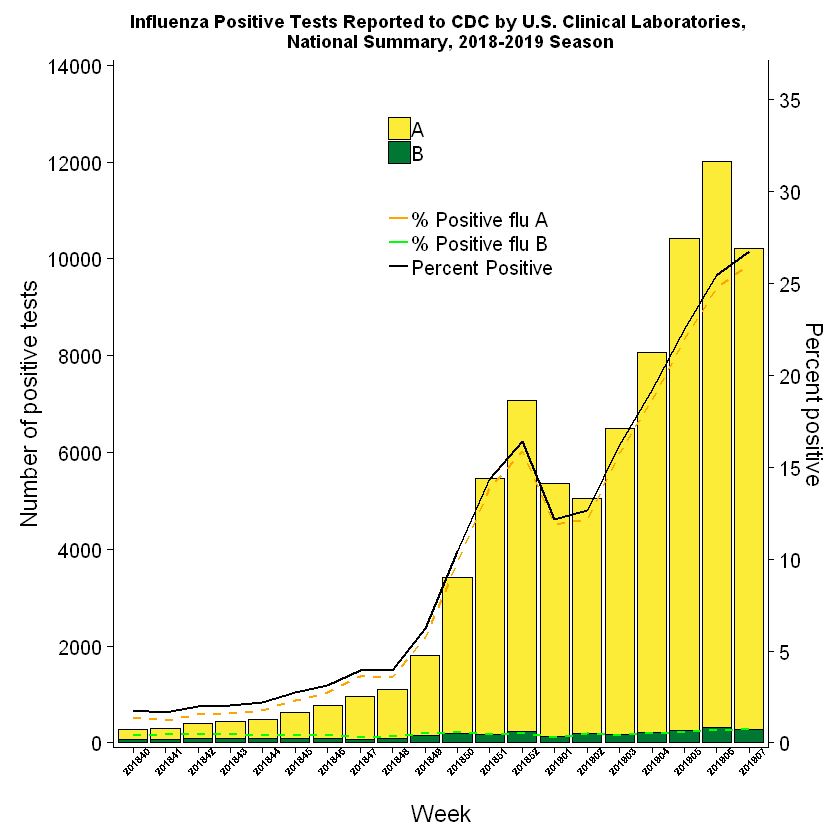

In [2]:
nat_sum <- read.csv("Positivetests_18-19.csv",header=T)
nat_df <- melt(nat_sum[,1:3], id.var="Week")

nat_pos <- data.frame(week=as.factor(nat_sum$Week),percent=nat_sum$X..Positive)
nat_A <- data.frame(week=as.factor(nat_sum$Week),percent=nat_sum$Percent.Positive.A)
nat_B <- data.frame(week=as.factor(nat_sum$Week),percent=nat_sum$Percent.Positive.B)

ggplot() + 
geom_bar(nat_df, mapping=aes(x =as.factor(Week), y = value, fill = variable),stat = "identity",colour="black")+
scale_y_continuous(breaks=seq(0,14000,2000),expand = c(0,100),limits=c(0,14000),sec.axis = sec_axis(~./380, name = "Percent positive",breaks=seq(0,35,5)))+
theme(axis.text.x = element_text(face="bold", color="black",size=6, angle=45),plot.title = element_text(size=11))+
scale_color_manual(values=c("orange","green","black"))+
scale_fill_manual(labels = c("A","B"),values=c("#fcec38", "#007733"))+
geom_line(data=nat_pos,mapping=aes(x=week, y=percent*380,group=1,color="Percent Positive"),stat = "identity",size=0.6,)+
geom_line(data=nat_A,mapping=aes(x=week, y=percent*380,group=1,color="% Positive flu A"),stat = "identity",linetype = "dashed",size=0.6)+
geom_line(data=nat_B,mapping=aes(x=week, y=percent*380,group=1,color="% Positive flu B"),stat = "identity",linetype = "dashed",size=0.6)+
# scale_linetype_manual(values=c("Percent Positive"=1,"% Positive flu A"=2,"% Positive flu B"=3))+
guides(linetype=guide_legend(keywidth = 2, keyheight = 1))+
labs(x = "Week",y="Number of positive tests",fill = "", title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, 
    National Summary, 2018-2019 Season")+
theme(legend.title = element_blank(),legend.position=c(.4,.8))

# 5.1 Results for the season 2017-2018

Influenza National Summary for the whole year

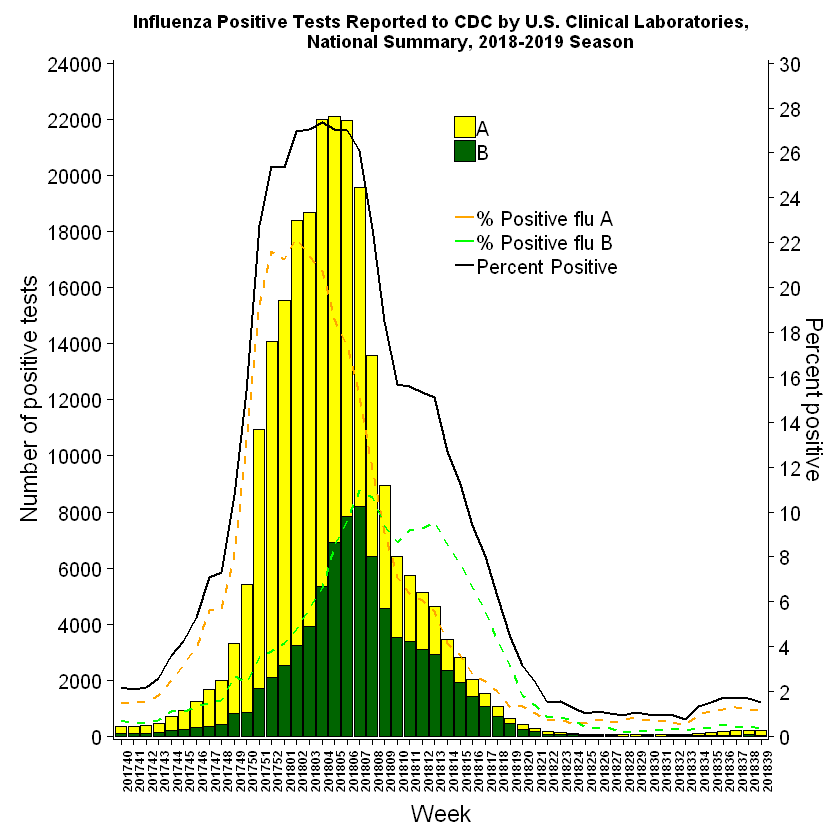

In [3]:
total_year <- read.csv("full_year_plot1.csv",header=T)
total_year$yearweek <- paste0(total_year$YEAR,ifelse(total_year$WEEK<10,paste0("0",total_year$WEEK,sep=""),total_year$WEEK),sep="")
melt_total <- melt(total_year[,c(11,6,7)], id.var="yearweek")
total <- data.frame(week=as.factor(total_year$yearweek),percent=total_year$PERCENT.POSITIVE)
total_A <- data.frame(week=as.factor(total_year$yearweek),percent=total_year$PERCENT.A)
total_B <- data.frame(week=as.factor(total_year$yearweek),percent=total_year$PERCENT.B)
ggplot() + 
geom_bar(melt_total, mapping=aes(x =as.factor(yearweek), y = value, fill = variable),stat = "identity",colour="black")+
scale_y_continuous(breaks=seq(0,24000,2000),expand = c(0,100),limits=c(0,24000),sec.axis = sec_axis(~./800, name = "Percent positive",breaks=seq(0,30,2)))+
 theme(axis.text.x = element_text(face="bold", color="black",size=7, angle=90),plot.title = element_text(size=11))+
scale_color_manual(values=c("orange","green","black"))+
scale_fill_manual(labels = c("A","B"),values=c( "yellow","darkgreen"))+
geom_line(data=total,mapping=aes(x=week, y=percent*800,group=1,color="Percent Positive"),stat = "identity",size=0.6,)+
geom_line(data=total_A,mapping=aes(x=week, y=percent*800,group=1,color="% Positive flu A"),stat = "identity",linetype = "dashed",size=0.6)+
geom_line(data=total_B,mapping=aes(x=week, y=percent*800,group=1,color="% Positive flu B"),stat = "identity",linetype = "dashed",size=0.6)+
scale_linetype_manual(values=c("Percent Positive"=1,"% Positive flu A"=2,"% Positive flu B"=3))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,
            National Summary, 2018-2019 Season",
     x = "Week",y="Number of positive tests",fill = "")+
theme(legend.title = element_blank(),legend.position=c(.5,.8))

# Results for Clinical Laboratories, NEW YORK STATE: Recent 52 Weeks

Influenza postive reports for the New York region in the year 2018-2019 

We plotted for the data between the year to the number of associated deaths for the New York region from the year 2004 to present

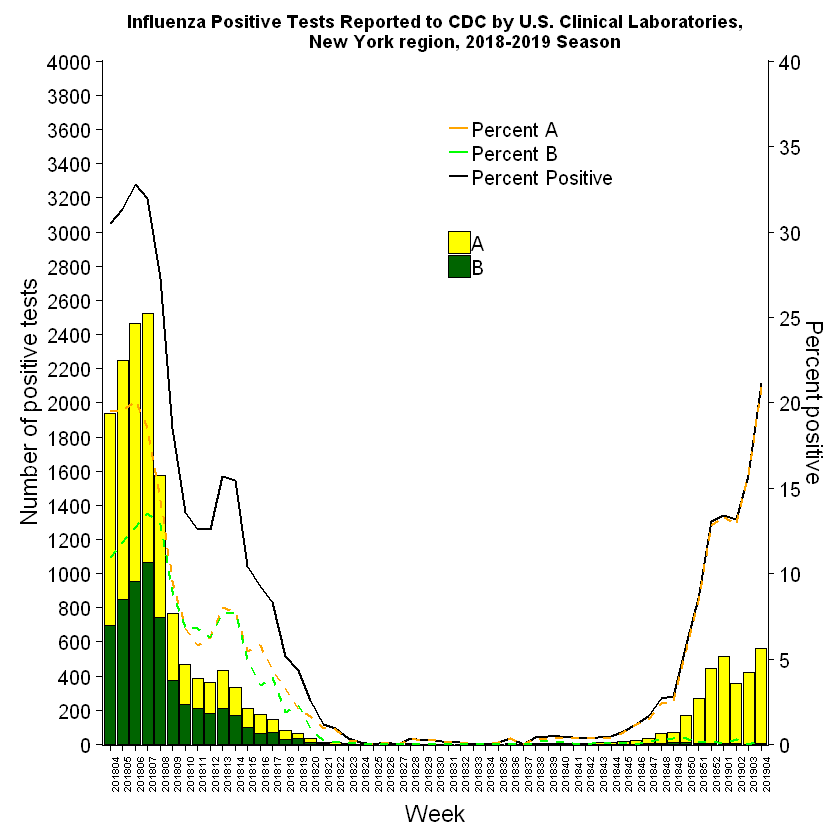

In [4]:
# setwd("C:/Semester2/DataIntensivecomputing/Lab1/sowmithnpart2/other required files/")
total_year <- read.csv("functional_newyork.csv")
total_year <- total_year[((total_year$YEAR==2018 & total_year$WEEK>=4) | (total_year$YEAR==2019 & total_year$WEEK<=4)),]
total_year$yearweek <- paste0(total_year$YEAR,ifelse(total_year$WEEK<10,paste0("0",total_year$WEEK,sep=""),total_year$WEEK),sep="")
melt_total <- melt(total_year[,c(11,6,7)], id.var="yearweek")
total <- data.frame(week=as.factor(total_year$yearweek),percent=total_year$PERCENT.POSITIVE)
total_A <- data.frame(week=as.factor(total_year$yearweek),percent=total_year$PERCENT.A)
total_B <- data.frame(week=as.factor(total_year$yearweek),percent=total_year$PERCENT.B)
ggplot() + 
geom_bar(melt_total, mapping=aes(x =as.factor(yearweek), y = value, fill = variable),stat = "identity",colour="black")+
scale_y_continuous(breaks=seq(0,4000,200),expand = c(0,5),limits=c(0,4000), sec.axis = sec_axis(~./100, name = "Percent positive",breaks=seq(0,50,5)))+
 theme(axis.text.x = element_text(face="bold", color="black",size=6, angle=90),plot.title = element_text(size=11))+
scale_color_manual(values=c("orange","green","black"))+
scale_fill_manual(labels = c("A","B"),values=c( "yellow","darkgreen"))+
geom_line(data=total,mapping=aes(x=week, y=percent*100,group=1,color="Percent Positive"),stat = "identity",size=0.6,)+
geom_line(data=total_A,mapping=aes(x=week, y=percent*100,group=1,color="Percent A"),stat = "identity",linetype = "dashed",size=0.6)+
geom_line(data=total_B,mapping=aes(x=week, y=percent*100,group=1,color="Percent B"),stat = "identity",linetype = "dashed",size=0.6)+
scale_linetype_manual(values=c("Percent Positive"=1,"Percent A"=2,"Percent B"=3))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,
            New York region, 2018-2019 Season",
     x = "Week",y="Number of positive tests",fill = "")+
theme(legend.title = element_blank(),legend.position=c(.5,.8))

# 2. Positive Tested


In [5]:
pos_test <- read.csv("Positivetests_diagram2.csv")

In [6]:
pos_test <- pos_test[,c(1,2,3,4,5,6,7,8)]

In [7]:
pos_test <- melt(pos_test, id.var='Week')

In [8]:
myfactor <- as.numeric(factor(pos_test$Week))

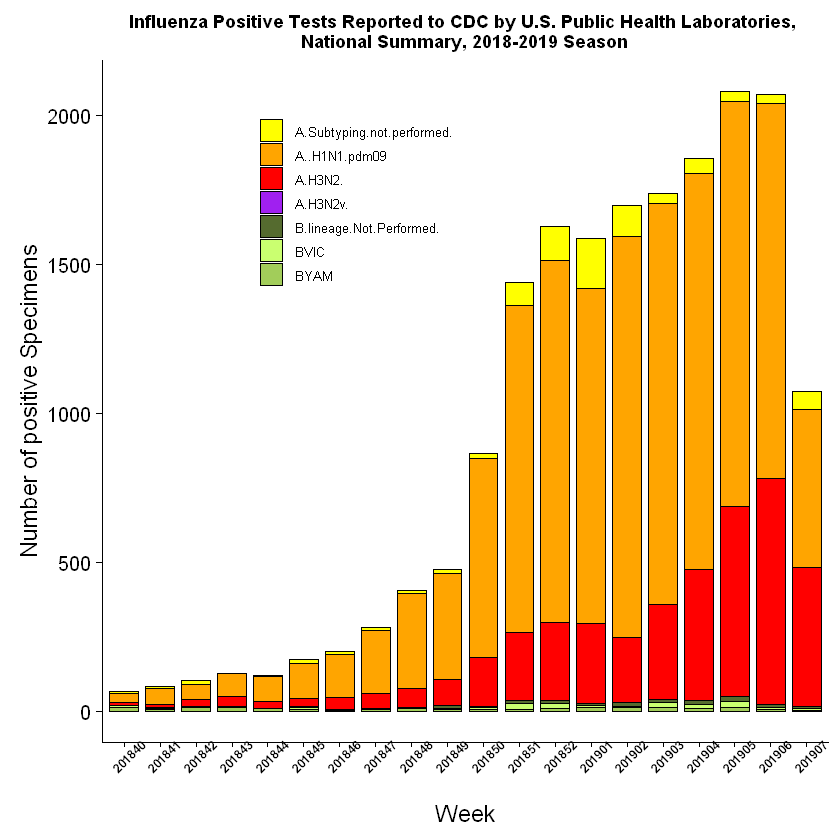

In [9]:
plot2<-ggplot(pos_test, aes(x=factor(pos_test$Week), y=value, fill=variable)) + 
geom_bar(stat='identity', color="black", width = 0.8) + 
scale_fill_manual(values = c("yellow", "orange", "red", "purple", "darkolivegreen", "darkolivegreen1", "darkolivegreen3"))+ 
theme(axis.text.x = element_text(face="bold", size = 6, angle=45))+
guides(fill=guide_legend(title=NULL))
plot2 <- plot2+
theme(axis.text.x = element_text(face="bold", color="#000000",size=7, angle=45),plot.title = element_text(size=11),legend.position=c(.2,.8),
     legend.text=element_text(size=8))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, \nNational Summary, 2018-2019 Season",
     x = "Week",y="Number of positive Specimens",fill = "")
plot2

# 5.2 Postive Tested for the whole year

Influenza Positive Reports by the entire year

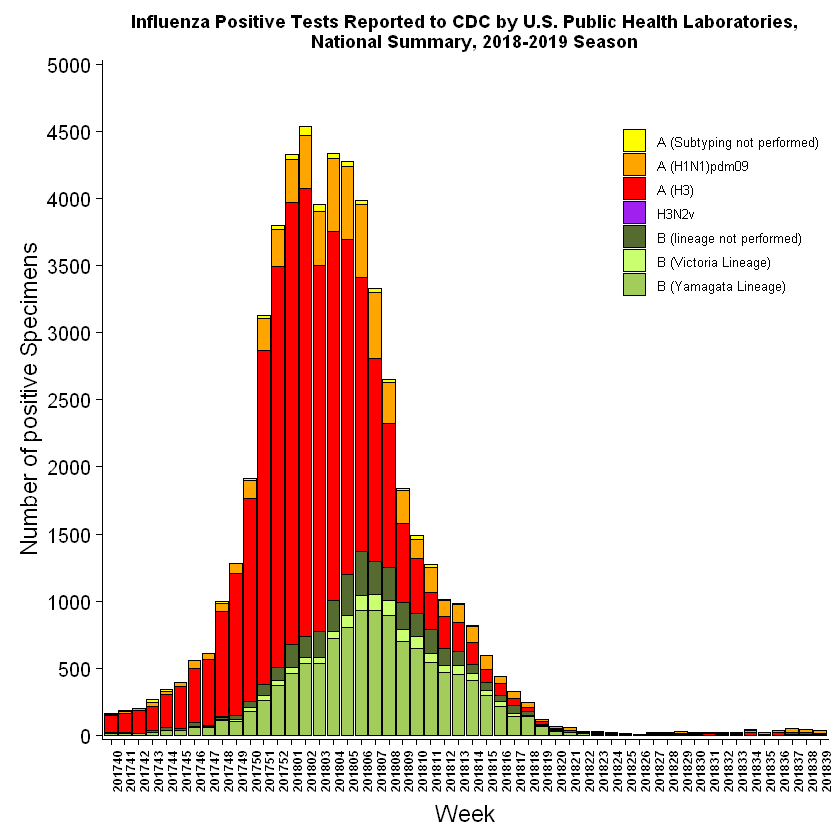

In [10]:
pos_total <- read.csv("full_year_plo2.csv",header=T)
pos_total$yearweek <- paste0(pos_total$YEAR,ifelse(pos_total$WEEK<10,paste0("0",pos_total$WEEK,sep=""),pos_total$WEEK),sep="")
pos_total <- melt(pos_total[,c(8,6,7,12,9,10,11,13) ], id.var="yearweek")

ggplot() + 
geom_bar(pos_total, mapping=aes(x =as.factor(yearweek), y = value, fill = variable),stat = "identity",colour="black")+
scale_y_continuous(breaks=seq(0,5000,500),expand = c(0,30),limits=c(0,5000))+
scale_fill_manual(labels = c("A (Subtyping not performed)","A (H1N1)pdm09","A (H3)","H3N2v","B (lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"),
                  values=c("yellow", "orange", "red", "purple", "darkolivegreen", "darkolivegreen1", "darkolivegreen3"))+
theme(axis.text.x = element_text(face="bold", color="black",size=7, angle=90),plot.title = element_text(size=11),legend.position=c(.7,.8),
     legend.text=element_text(size=8))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories,
    National Summary, 2018-2019 Season",
     x = "Week",y="Number of positive Specimens",fill = "")

# 3. Pie chart

par() function we include mfrow and mfcol through which we can combine multiple plots

Installing the packages

par() function we include mfrow and mfcol through which we can combine multiple plots

mai
A numerical vector of the form c(bottom, left, top, right) which gives the margin size specified in inches.

cex
A numerical value giving the amount by which plotting text and symbols should be magnified relative to the default. This starts as 1 when a device is opened, and is reset when the layout is changed, e.g. by setting mfrow.

In [11]:
pie_VicB <- read.csv("./Genetic07.csv")[1:3,]
pie_YamaB <- read.csv("./Genetic07.csv")[3,]
pie_H3 <- read.csv("./Genetic07.csv")[6:8,]
pie_H1pdm09 <- read.csv("./Genetic07.csv")[5,]
pie_main <- read.csv("./pie_cumulative.csv",header=T)

In [12]:
val1 <- pie_VicB$Total
val2 <- pie_YamaB$Total
val3 <- pie_H3$Total
val4 <- pie_H1pdm09$Total
val5 <- pie_main$Cummulative

In [13]:
pie_VicB
pie_YamaB
pie_H3
pie_H1pdm09
pie_main
pattern.type <- c('vlines')

X.Sub.type,Sequence.Genetic.Group,Distinct.count.of.Cdc.Id..,Total
B/Victoria,V1A,15,31.3
B/Victoria,V1A.1,30,62.5
B/Victoria,V1A-3DEL,3,6.3


,X.Sub.type,Sequence.Genetic.Group,Distinct.count.of.Cdc.Id..,Total
3,B/Victoria,V1A-3DEL,3,6.3


,X.Sub.type,Sequence.Genetic.Group,Distinct.count.of.Cdc.Id..,Total
6,H3,3C.2a,62,16.3
7,H3,3C.2a1,122,32.0
8,H3,3C.3a,197,51.7


,X.Sub.type,Sequence.Genetic.Group,Distinct.count.of.Cdc.Id..,Total
5,H1pdm09,6B.1,626,100


Type,Cummulative
Influenza A(H3N2),4142
Influenza A(H1N1)PDM09,12720
Influenza A(subtype unknown),774
Influenza B Victoria,144
Influenza B Yamagata,178
Influenza B(lineage not determined),118


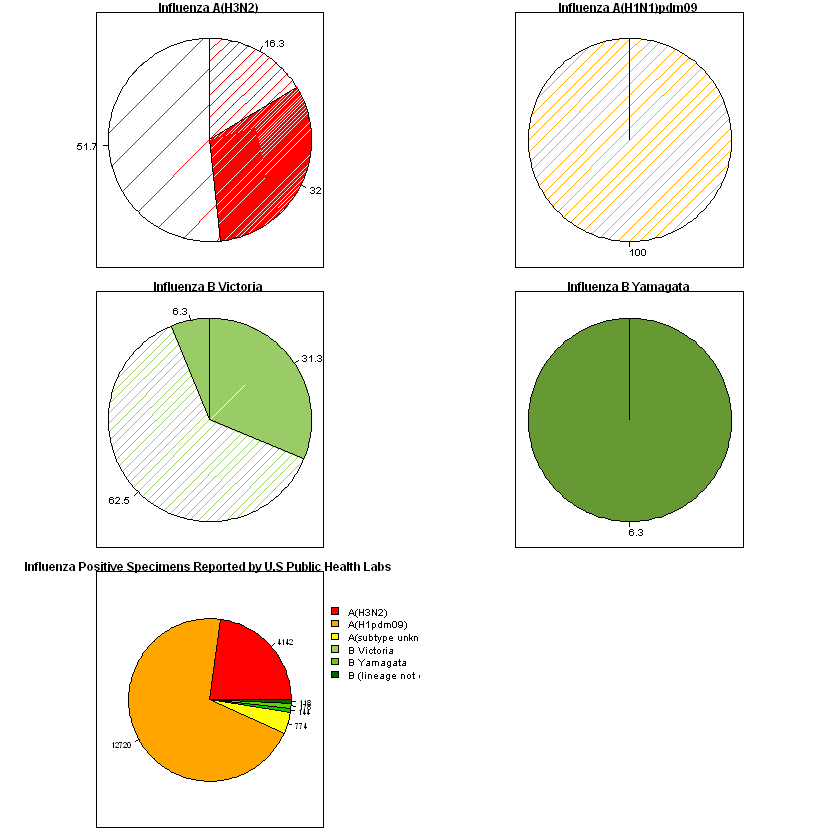

In [14]:
par(mfrow=c(3,2), cex= 0.5, mai= c(0.1,0.8,0.1,0.8))

pie(pie_H3$Distinct.count.of.Cdc.Id.., val3, radius=1, main = "Influenza A(H3N2)", clockwise=TRUE, density=c(16,200,5), col= "red", border = "black")
box(which= "plot", lty = "solid")

pie(pie_H1pdm09$Distinct.count.of.Cdc.Id.., val4, radius=1, main = "Influenza A(H1N1)pdm09", clockwise=TRUE, density=16, col= "orange", border = "black")
box(which= "plot", lty = "solid")

pie(pie_VicB$Distinct.count.of.Cdc.Id.., val1,radius=1, main = "Influenza B Victoria", clockwise=TRUE, density=c(5000, 20), col= "#99CC66", border = "black")
box(which= "plot", lty = "solid")

pie(pie_YamaB$Distinct.count.of.Cdc.Id.., val2, radius=1,main = "Influenza B Yamagata", clockwise=TRUE, col= "#669933", border = "black")
box(which= "plot", lty = "solid")

pielabels <- c("A(H3N2)", "A(H1pdm09)", "A(subtype unknown)", "B Victoria", "B Yamagata", "B (lineage not determined)" )
pie(pie_main$Cummulative,labels = pie_main$Cummulative, border = "black", main = "Influenza Positive Specimens Reported by U.S Public Health Labs", cex=0.8, col = c("red", "orange", "yellow", "green3", "chartreuse3", "darkgreen"))
box(which= "plot", lty = "solid")

par(xpd = TRUE)
legend(1.1, 1, legend=pielabels,bty="n",
       fill=c("red", "orange", "yellow", "darkolivegreen3", "chartreuse3", "darkgreen"))


# 4. Mortality

In [15]:
mort_df <- read.csv("mortality.csv",stringsAsFactors=F)

In [16]:
mort_df

Year,Week,Percent.of.Deaths.Due.to.Pneumonia.and.Influenza,Expected,Threshold,All.Deaths,Pneumonia.Deaths,Influenza.Deaths
2009,40,7.827717,7.23411,7.50529,46412,3484,149
2009,41,8.346070,7.32283,7.59398,46453,3703,174
2009,42,8.598344,7.41794,7.68906,47451,3841,239
2009,43,8.737509,7.51805,7.78913,46432,3762,295
2009,44,8.773115,7.62168,7.89273,47372,3858,298
2009,45,8.864184,7.72731,7.99833,47314,3929,265
2009,46,8.444559,7.83339,8.10437,46527,3721,208
2009,47,8.259015,7.93837,8.20931,46422,3655,179
2009,48,8.168431,8.04070,8.31161,47806,3779,126
2009,49,8.289388,8.13888,8.40976,49304,3982,105


Here we modify the existing year anda week, we create a new column yearweek where we capture the weeks only greater than 40.

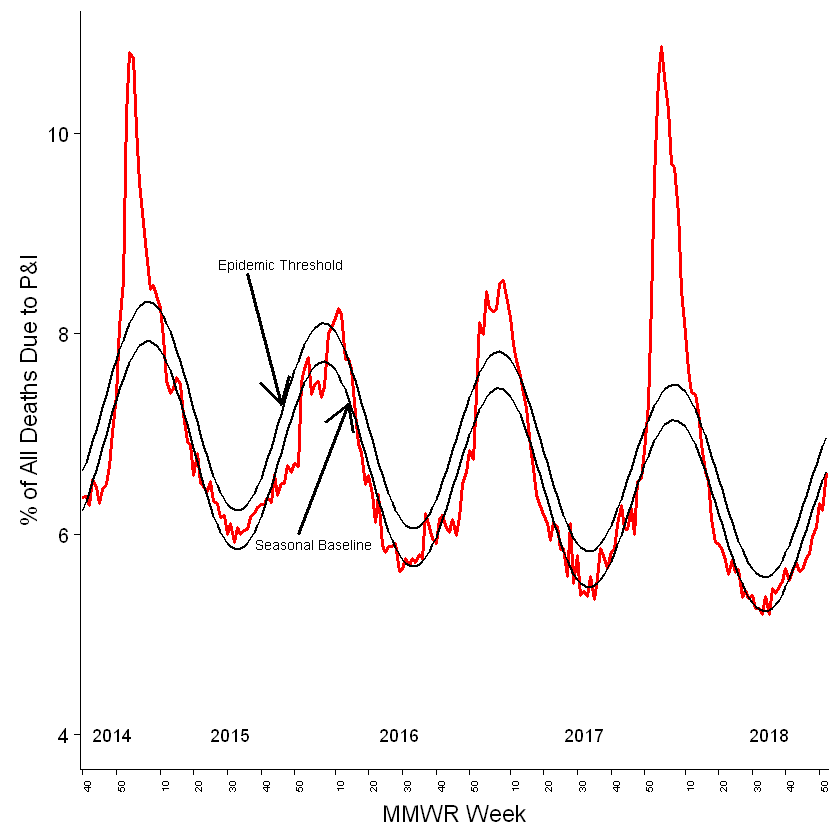

In [17]:
df_mort <- read.csv("mortality.csv",stringsAsFactors=F)
df_mort <- df_mort[(df_mort$Year=="2014" & df_mort$Week>=40) | df_mort$Year=="2015" | df_mort$Year=="2016" | df_mort$Year=="2017" | df_mort$Year=="2018", ]
df_mort$yearweek <- paste0(df_mort$Year,ifelse(df_mort$Week<10,paste0("0",df_mort$Week,sep=""),df_mort$Week),sep="")
total_frame <- subset(df_mort, (as.numeric(df_mort$yearweek) %% 10) ==0) 
ggplot(df_mort, aes(x=df_mort$yearweek, y=as.numeric(Percent.of.Deaths.Due.to.Pneumonia.and.Influenza),group=1)) + 
scale_y_continuous(breaks=seq(4,14,2))+
scale_x_discrete(breaks=total_frame$yearweek,labels=total_frame$Week)+
theme(axis.text.x = element_text( color="black",size=6, angle=90))+
geom_line(color="red",size=1)+
labs(x = "MMWR Week",y="% of All Deaths Due to P&I")+
annotate("text", x = c(10:10,45:45,95:95,150:150,205:205), y = c(4:4,4:4,4:4,4:4,4:4), label = c("2014","2015","2016","2017","2018"))+
geom_line(data=df_mort,mapping=aes(x=df_mort$yearweek,y=as.numeric(Expected),group=1),color="black",size=0.8)+
geom_line(data=df_mort,mapping=aes(x=df_mort$yearweek, y=as.numeric(Threshold),group=1),color="black",size=0.8)+
theme(legend.position="none")+
annotate("segment", x = 65, xend = 80, y = 6, yend = 7.3, colour = "black", size=1, arrow=arrow())+
annotate("segment", x = 50, xend = 60, y = 8.6, yend = 7.3, colour = "black", size=1, arrow=arrow())+
annotate("text", x = c(70,60), y = c(5.9,8.7), label = c("Seasonal Baseline", "Epidemic Threshold") , color="black", size=3)

# 5. Pediatric Deaths

In [18]:
ped_df <- read.csv("Weekly.csv")

In [19]:
 ped_df<- ped_df[,c("WEEK.NUMBER","CURRENT.WEEK.DEATHS","PREVIOUS.WEEK.DEATHS")]

To get the x-axis in a repetitive from every year 2015-16 to present on a weekly manner

In [20]:
 
x_df <- ped_df[seq(1, 176, 6), ]$WEEK.NUMBER


In [21]:
ped_df <- melt(ped_df, id.var="WEEK.NUMBER")

In [22]:
head(ped_df)

WEEK.NUMBER,variable,value
2015-40,CURRENT.WEEK.DEATHS,0
2015-41,CURRENT.WEEK.DEATHS,0
2015-42,CURRENT.WEEK.DEATHS,0
2015-43,CURRENT.WEEK.DEATHS,0
2015-44,CURRENT.WEEK.DEATHS,0
2015-45,CURRENT.WEEK.DEATHS,0


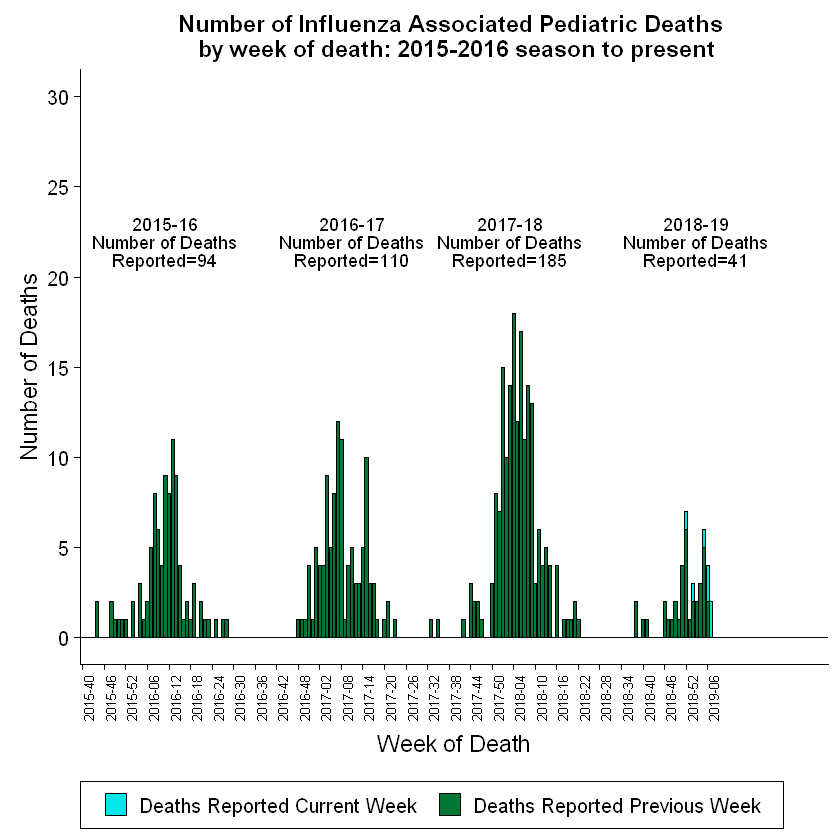

In [23]:
ggplot() + 
geom_bar(ped_df, mapping=aes(x =as.factor(ped_df$WEEK.NUMBER), y = value, fill = variable),stat = "identity",color="black")+
scale_y_continuous(limits=c(0,30),breaks=seq(0,30,5))+
theme(axis.text.x = element_text( color="black",size=8, angle=90),
      legend.position="bottom", legend.box = "horizontal",legend.background = element_blank(),
        legend.box.background = element_rect(colour = "black"))+
scale_x_discrete(breaks=x_df, labels=x_df)+
annotate("text", x = 24:24, y = 23:21, label = c("2015-16","Number of Deaths","Reported=94"))+
annotate("text", x = 76:76, y = 23:21, label = c("2016-17","Number of Deaths","Reported=110"))+
annotate("text", x = 120:120, y = 23:21, label = c("2017-18","Number of Deaths","Reported=185"))+
annotate("text", x = 172:172, y = 23:21, label = c("2018-19","Number of Deaths","Reported=41"))+
labs(title="Number of Influenza Associated Pediatric Deaths \n by week of death: 2015-2016 season to present",
     fill = "",x = "Week of Death",y="Number of Deaths")+
scale_fill_manual(labels = c("Deaths Reported Current Week","Deaths Reported Previous Week"),values=c("#03e7e8","#007733"))+
geom_text()

# 6. Heat Map

Attaching the required packages

Reading the dataframe

In [24]:
map_df<-read.csv('heatmap.csv')

In [25]:
head(map_df)

STATENAME,URL,WEBSITE,ACTIVITY.LEVEL,ACTIVITY.LEVEL.LABEL,WEEKEND,WEEK,SEASON
Alabama,http://adph.org/influenza/,Influenza Surveillance,Level 2,Minimal,Oct-06-2018,40,2018-19
Alaska,http://dhss.alaska.gov/dph/Epi/id/Pages/influenza/influenza.aspx%20,Influenza Surveillance Report,Level 1,Minimal,Oct-06-2018,40,2018-19
Arizona,http://www.azdhs.gov/phs/oids/epi/flu/index.htm,Influenza & RSV Surveillance,Level 1,Minimal,Oct-06-2018,40,2018-19
Arkansas,http://www.healthy.arkansas.gov/programs-services/topics/influenza,Communicable Disease and Immunizations,Level 1,Minimal,Oct-06-2018,40,2018-19
California,https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/Immunization/Influenza.aspx,Influenza (Flu),Level 1,Minimal,Oct-06-2018,40,2018-19
Colorado,https://www.colorado.gov/pacific/cdphe/influenza,Influenza Surveillance,Level 1,Minimal,Oct-06-2018,40,2018-19


Required dataframe

In [26]:
map_df <- map_df[,c("STATENAME","ACTIVITY.LEVEL")]

In [27]:
head(map_df)

STATENAME,ACTIVITY.LEVEL
Alabama,Level 2
Alaska,Level 1
Arizona,Level 1
Arkansas,Level 1
California,Level 1
Colorado,Level 1


Converting the region names to lower case

In [28]:
map_df$region=tolower(map_df$STATENAME)

In [29]:
head(map_df)

STATENAME,ACTIVITY.LEVEL,region
Alabama,Level 2,alabama
Alaska,Level 1,alaska
Arizona,Level 1,arizona
Arkansas,Level 1,arkansas
California,Level 1,california
Colorado,Level 1,colorado


Using the map_data function and merging based on the region

In [30]:
merge_df <- merge(map_data("state"),map_df, by="region")

In [31]:
head(merge_df)

region,long,lat,group,order,subregion,STATENAME,ACTIVITY.LEVEL
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 9
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 5
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 6
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 2
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 5
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 10


To get the numeric value from activity.level and just plot the map

In [32]:
merge_df$activity = as.numeric(gsub("\\Level ", "", merge_df$ACTIVITY.LEVEL))

In [33]:
head(merge_df)

region,long,lat,group,order,subregion,STATENAME,ACTIVITY.LEVEL,activity
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 9,9
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 5,5
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 6,6
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 2,2
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 5,5
alabama,-87.46201,30.38968,1,1,NA,Alabama,Level 10,10


In [34]:
str(merge_df)

'data.frame':	310740 obs. of  9 variables:
 $ region        : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ long          : num  -87.5 -87.5 -87.5 -87.5 -87.5 ...
 $ lat           : num  30.4 30.4 30.4 30.4 30.4 ...
 $ group         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ subregion     : chr  NA NA NA NA ...
 $ STATENAME     : Factor w/ 54 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ACTIVITY.LEVEL: Factor w/ 11 levels "Level 0","Level 1",..: 11 7 8 4 7 3 4 10 9 8 ...
 $ activity      : num  9 5 6 2 5 10 2 8 7 6 ...


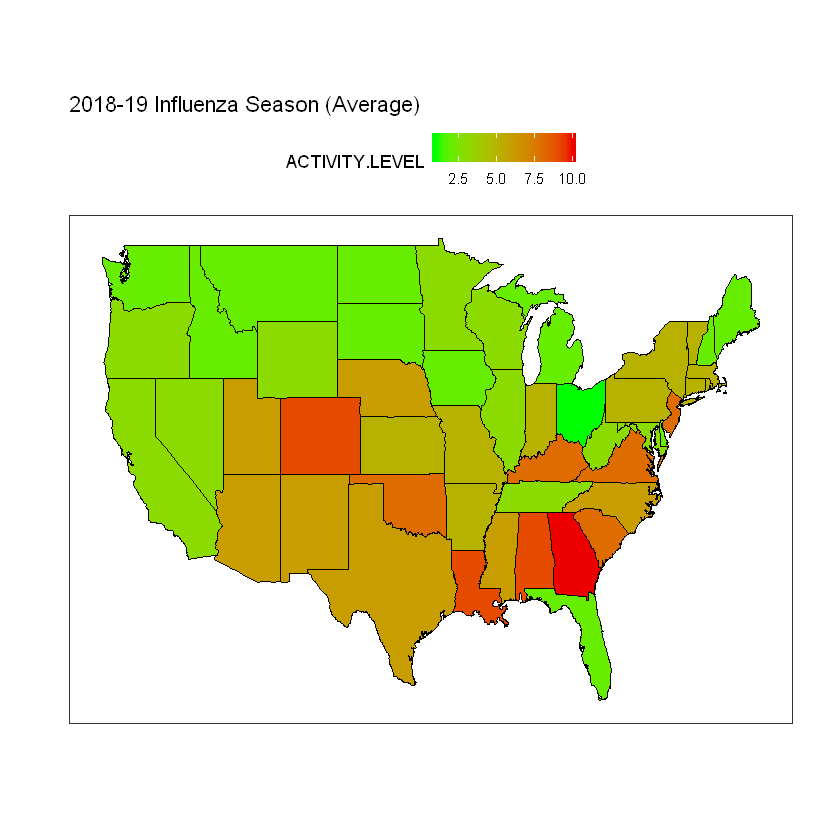

In [35]:
library(usmap)
library(ggplot2)
heat <- read.csv("heatmap.csv",header=T)
heat$lev <- as.numeric(gsub("[^[:digit:]]","",heat$ACTIVITY.LEVEL))
avgdf <- aggregate(heat[, 9], list(heat$STATENAME), mean)
colnames(avgdf)  <- c("state","level")
avgdf$level <- round(avgdf$level, digits = 0)
avgdf$level <- cut(avgdf$level, breaks = 10,labels=c(1,2,3,4,5,6,7,8,9,10))
avgdf$level <- as.numeric(avgdf$level)
avgdf$region <- tolower(avgdf$state)
merged_dataframes<-merge(map_data("state"),avgdf, by="region")
p <- ggplot()
p <- p + geom_polygon(data=merged_dataframes, aes(x=long, y=lat, group = group, fill=merged_dataframes$level),colour="Black") 
p<-p+scale_fill_continuous(low = "green", high = "red2", space = "Lab",na.value = "black", guide="colorbar")
p <- p + theme_bw()  + labs(fill = "ACTIVITY.LEVEL" ,title = "2018-19 Influenza Season (Average)", x="", y="")
p + scale_y_continuous(breaks=c()) + scale_x_continuous(breaks=c()) + 
    theme(legend.position="top", plot.margin = unit(c(2,1,2,1),"cm"))



Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



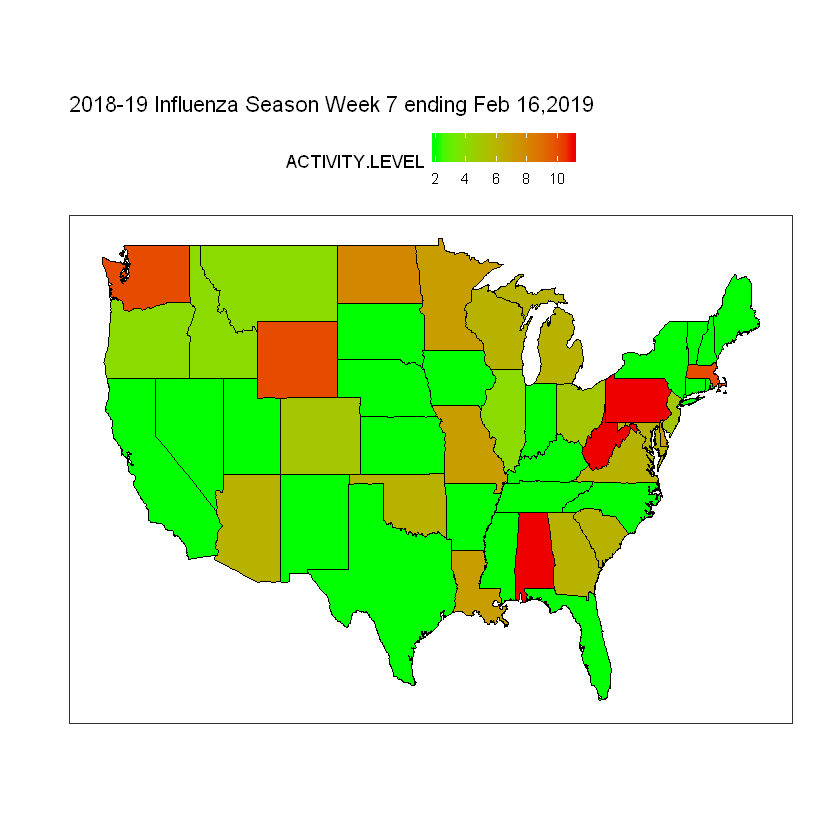

In [36]:
library(ggplot2)
library(dplyr)
heat_map_df <- read.csv('heatmap.csv')
heat_map_df <- heat_map_df[,c("STATENAME","ACTIVITY.LEVEL")]
heat_map_df$region <- tolower(heat_map_df$STATENAME)
# str(heat_map_df)
heat_map_df$ACTIVITY.LEVEL <- as.numeric(heat_map_df$ACTIVITY.LEVEL)
merged_dataframes<-merge(map_data("state"),heat_map_df, by="region")
p <- ggplot()
p <- p + geom_polygon(data=merged_dataframes, aes(x=long, y=lat, group = group, fill=merged_dataframes$ACTIVITY.LEVEL),colour="Black") 
p<-p+scale_fill_continuous(low = "green", high = "red2", space = "Lab",na.value = "black", guide="colorbar")
p <- p + theme_bw()  + labs(fill = "ACTIVITY.LEVEL" ,title = "2018-19 Influenza Season Week 7 ending Feb 16,2019", x="", y="")
p + scale_y_continuous(breaks=c()) + scale_x_continuous(breaks=c()) + 
    theme(legend.position="top", plot.margin = unit(c(2,1,2,1),"cm"))



# Heat Map for January Week1-Week2

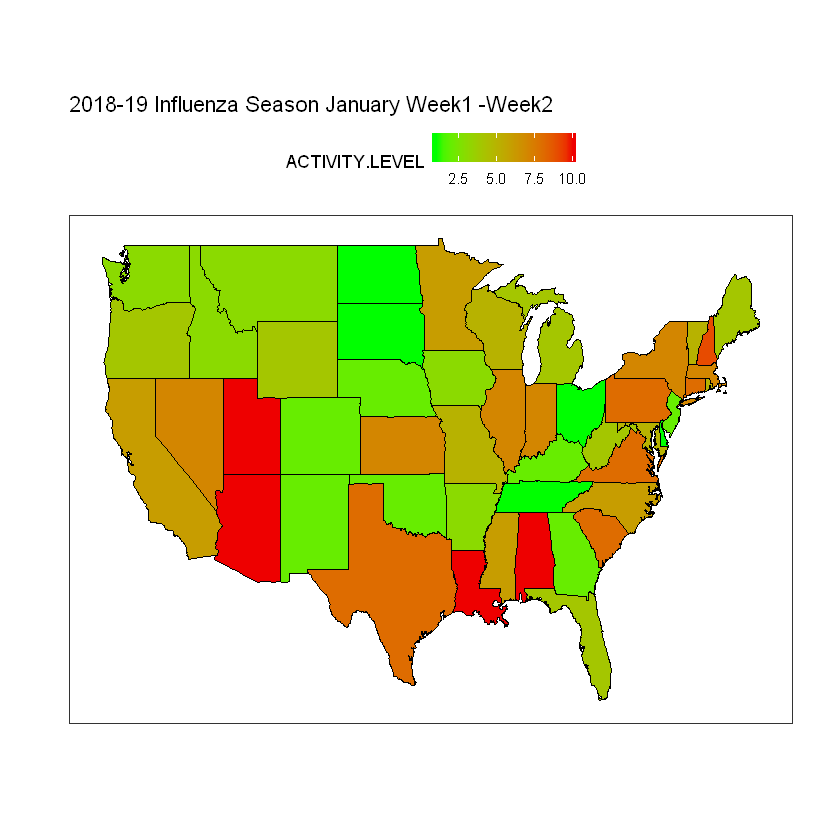

In [43]:
library(ggplot2)
library(dplyr)
# setwd("C:/Semester2/DataIntensivecomputing/Lab1/lab1part2")
heat_map_df <- read.csv('week1-2.csv')
heat_map_df <- heat_map_df[,c("STATENAME","ACTIVITY.LEVEL")]
heat_map_df$region <- tolower(heat_map_df$STATENAME)
#str(heat_map_df)
heat_map_df$ACTIVITY.LEVEL <- as.numeric(heat_map_df$ACTIVITY.LEVEL)
merged_dataframes<-merge(map_data("state"),heat_map_df, by="region")
p <- ggplot()
p <- p + geom_polygon(data=merged_dataframes, aes(x=long, y=lat, group = group, fill=merged_dataframes$ACTIVITY.LEVEL),colour="Black",lwd=.2) 
p<-p+scale_fill_continuous(low = "green", high = "red2", space = "Lab",na.value = "black", guide="colorbar")
p <- p + theme_bw()  + labs(fill = "ACTIVITY.LEVEL" ,title = "2018-19 Influenza Season January Week1 -Week2", x="", y="")
p + scale_y_continuous(breaks=c()) + scale_x_continuous(breaks=c()) +  theme(legend.position="top", plot.margin = unit(c(2,1,2,1),"cm"))

# 2019 Influenza Season January week2-3

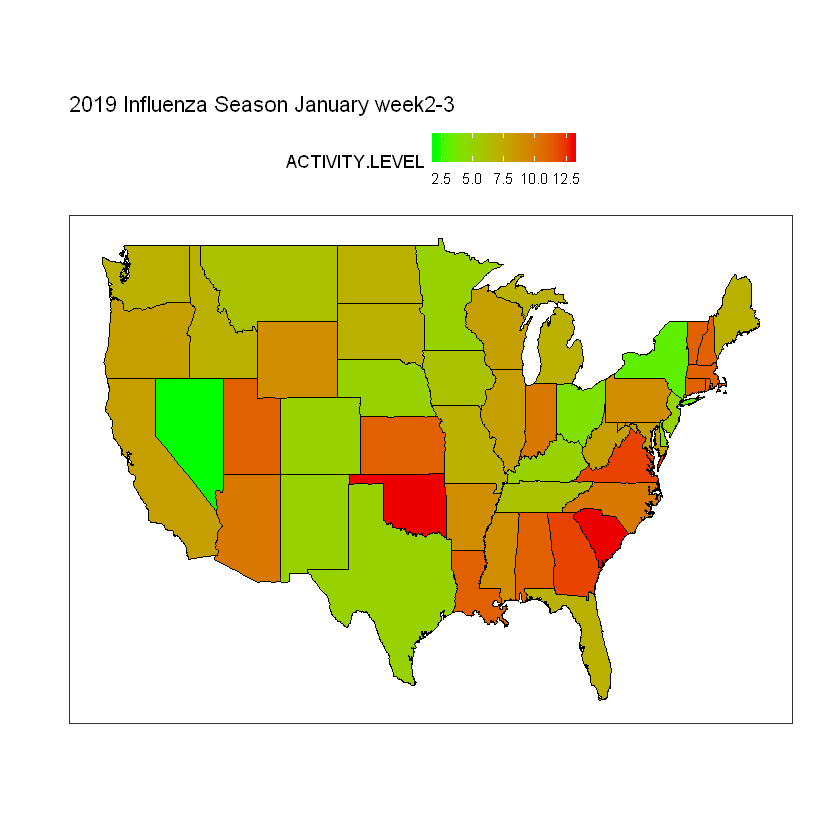

In [44]:
library(ggplot2)
library(dplyr)
# setwd("C:/Semester2/DataIntensivecomputing/Lab1/lab1part2")
heat_map_df <- read.csv('week2-3.csv')
heat_map_df <- heat_map_df[,c("STATENAME","ACTIVITY.LEVEL")]
heat_map_df$region <- tolower(heat_map_df$STATENAME)
#str(heat_map_df)
heat_map_df$ACTIVITY.LEVEL <- as.numeric(heat_map_df$ACTIVITY.LEVEL)
merged_dataframes<-merge(map_data("state"),heat_map_df, by="region")
p <- ggplot()
p <- p + geom_polygon(data=merged_dataframes, aes(x=long, y=lat, group = group, fill=merged_dataframes$ACTIVITY.LEVEL),colour="Black",lwd=.2) 
p<-p+scale_fill_continuous(low = "green", high = "red2", space = "Lab",na.value = "black", guide="colorbar")
p <- p + theme_bw()  + labs(fill = "ACTIVITY.LEVEL" ,title = "2019 Influenza Season January week2-3", x="", y="")
p + scale_y_continuous(breaks=c()) + scale_x_continuous(breaks=c()) +  theme(legend.position="top", plot.margin = unit(c(2,1,2,1),"cm"))

# 2019 Influenza Season January 3-4 Week

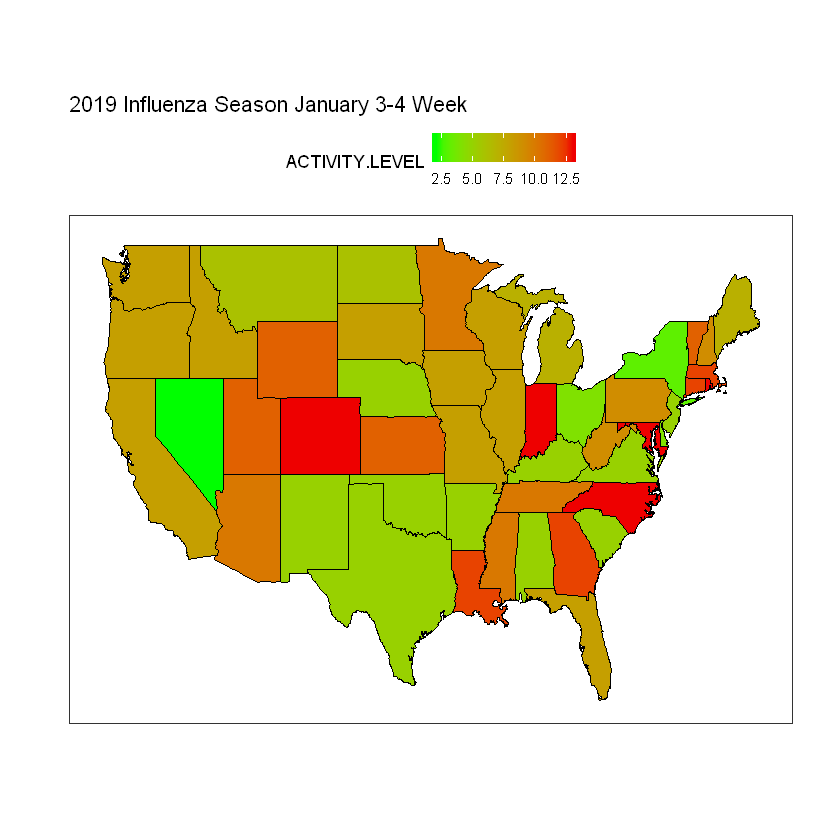

In [45]:
library(ggplot2)
library(dplyr)
heat_map_df <- read.csv('week3-4.csv')
heat_map_df <- heat_map_df[,c("STATENAME","ACTIVITY.LEVEL")]
heat_map_df$region <- tolower(heat_map_df$STATENAME)
#str(heat_map_df)
heat_map_df$ACTIVITY.LEVEL <- as.numeric(heat_map_df$ACTIVITY.LEVEL)
merged_dataframes<-merge(map_data("state"),heat_map_df, by="region")
p <- ggplot()
p <- p + geom_polygon(data=merged_dataframes, aes(x=long, y=lat, group = group, fill=merged_dataframes$ACTIVITY.LEVEL),colour="Black",lwd=.2) 
p<-p+scale_fill_continuous(low = "green", high = "red2", space = "Lab",na.value = "black", guide="colorbar")
p <- p + theme_bw()  + labs(fill = "ACTIVITY.LEVEL" ,title = "2019 Influenza Season January 3-4 Week", x="", y="")
p + scale_y_continuous(breaks=c()) + scale_x_continuous(breaks=c()) +  theme(legend.position="top", plot.margin = unit(c(2,1,2,1),"cm"))